In [11]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [12]:
# Dataset
df = pd.read_excel(r"D:\data science\Assignments\assign\heart_disease.xlsx")


df.head()


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [13]:
# EDA
df.info()

# Summary statistics
df.describe()

# Missing values
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


age             0
Age in years    0
dtype: int64

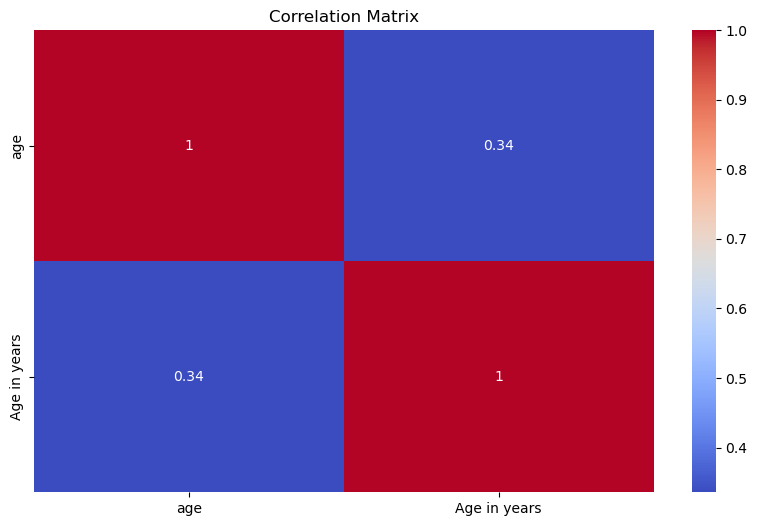

In [25]:
# correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


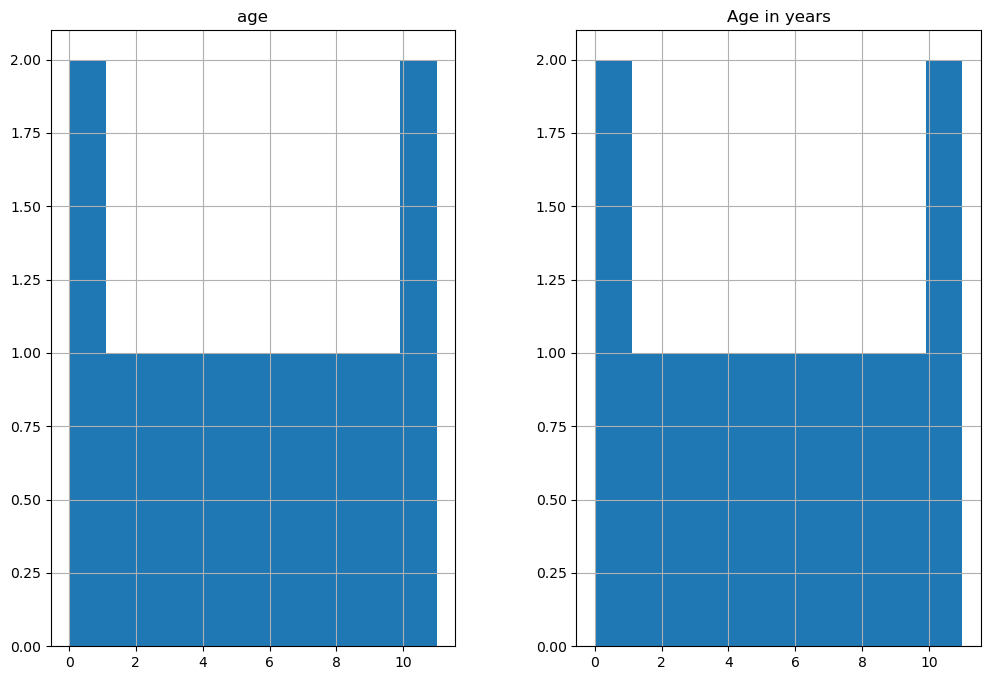

In [26]:
# Histograms
df_encoded.hist(figsize=(12, 8))
plt.show()


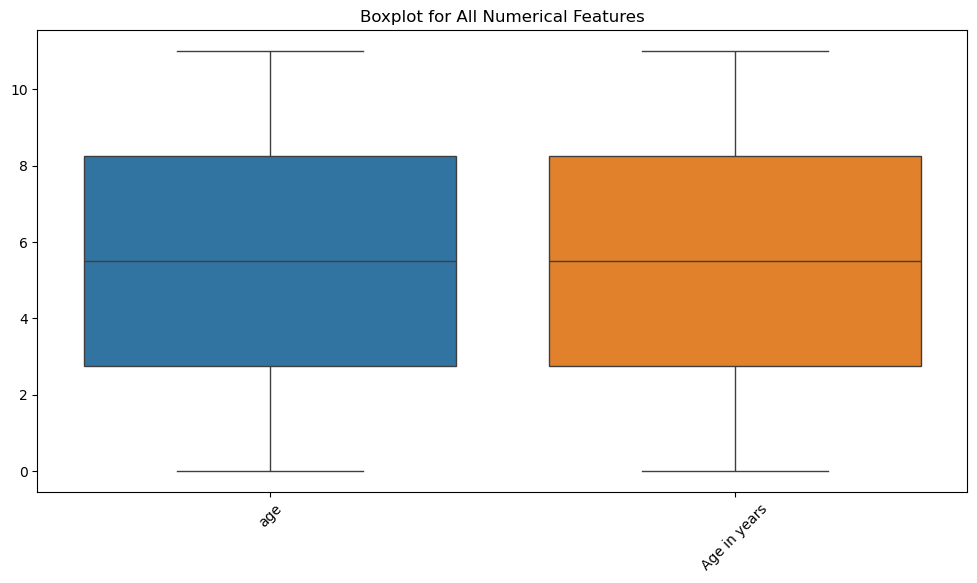

In [27]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded)
plt.title("Boxplot for All Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Feature Engineering 
# Encode Categorical variables

df_encoded = df.copy()
encoder = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()


,age,Age in years
0,0,2
1,2,1
2,11,3
3,1,6
4,4,0


In [19]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df_encoded[['age']]              # Feature
y = df_encoded['Age in years']       # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)
print("Train y shape:", y_train.shape)
print("Test y shape:", y_test.shape)





Train X shape: (9, 1)
Test X shape: (3, 1)
Train y shape: (9,)
Test y shape: (3,)


In [20]:
# Decision Tree Clasifier 
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))



Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [21]:
# Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier

best_score = 0
best_params = {}

for depth in [None, 2, 3, 4, 5]:
    for split in [2, 3, 4]:
        model = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=split,
            random_state=42
        )
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_params = {"max_depth": depth, "min_samples_split": split}

print("Best Score:", best_score)
print("Best Params:", best_params)



Best Score: 0
Best Params: {}


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



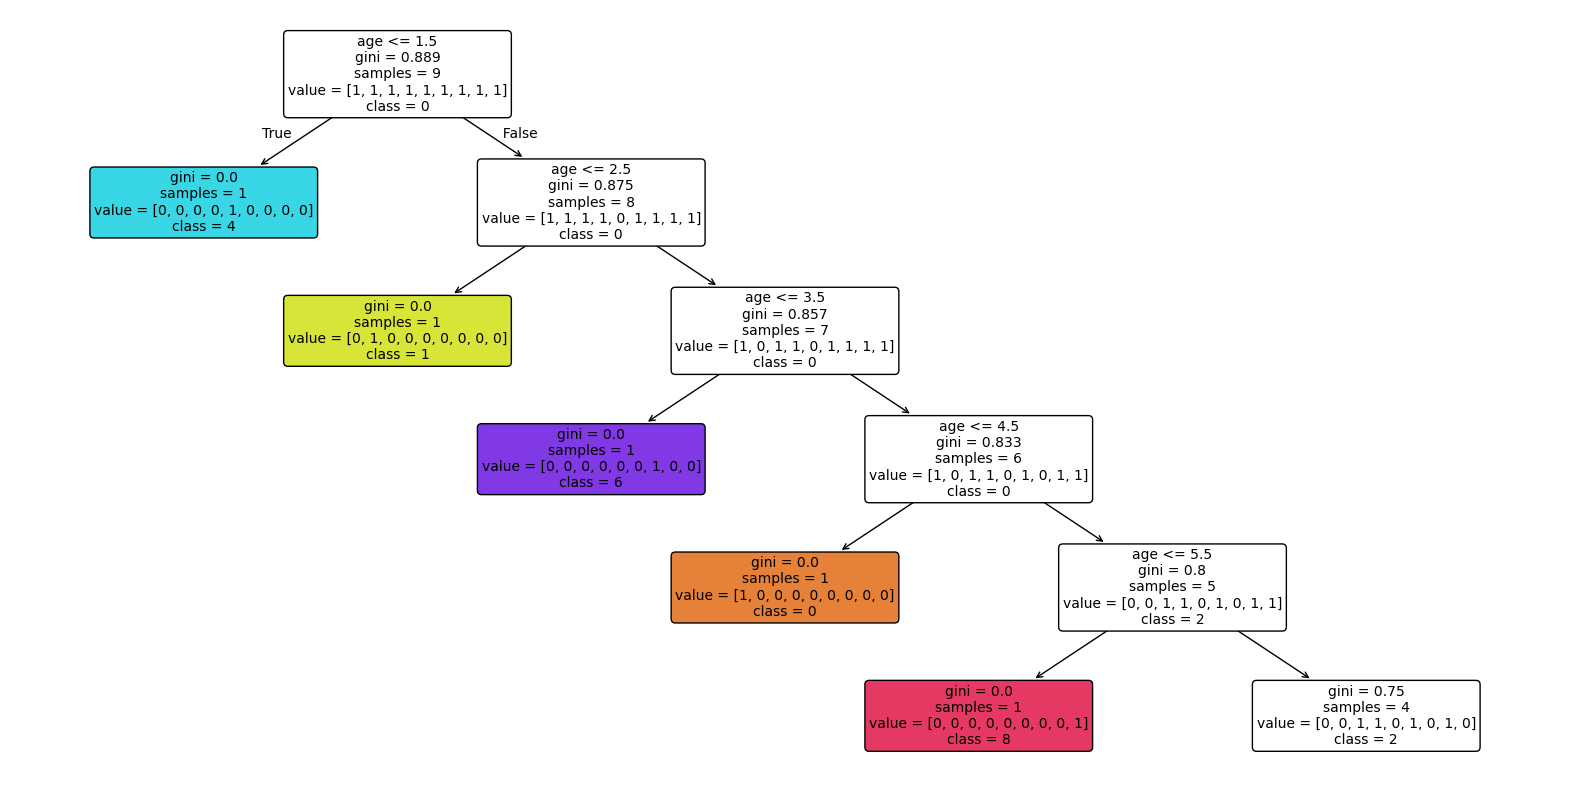


Decision Tree Visualized Successfully


In [29]:

. VISUALIZE DECISION TREE

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

print("\nDecision Tree Visualized Successfully")


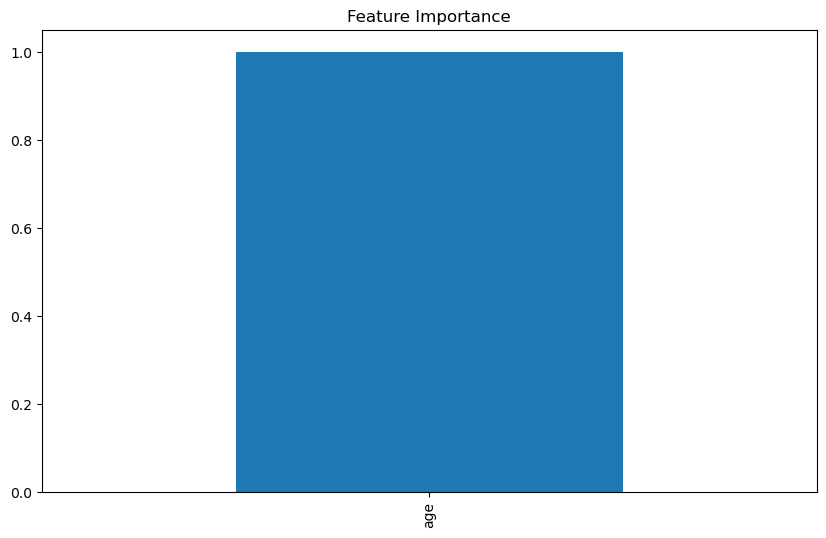

In [32]:
# FEATURE IMPORTANCE
importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
importances.sort_values(ascending=False).plot(kind="bar")
plt.title("Feature Importance")
plt.show()

In [ ]:
#Interview Question's

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
 
# Common hyperparameters of decision tree models include max depth, min samples split, min samples leaf, criterion, and max features. Max depth 
# controls how deep the tree can grow and prevents overfitting. Min samples split and min samples leaf control how many samples are needed to 
# create splits, which helps reduce overfitting. Criterion decides how the tree chooses the best split. Max features limits how many features are 
# used at each split and helps improve generalization.

# 2. What is the difference between the Label encoding and One-hot encoding?

# Label encoding converts categories into numbers like 0, 1, and 2. One hot encoding creates separate columns for each category and marks presence with
# 1 and absence with 0. Label encoding is simple but can create false order. One hot encoding avoids false order but increases the number of columns.


